In [1]:
#!pip install tqdm
#!pip install shap 
#import shap #pip install shap which requires tqdm version >= 4.29.1 (pip install tqdm==4.29.1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [4]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

Generate Validation Set from X_train

In [5]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [6]:

svc = SVC(gamma=0.001, C=100., kernel = 'linear')



In [7]:
svc.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001, kernel='linear')

In [8]:
svc_train_pred = svc.predict(X_train)
print(classification_report(y_train, svc_train_pred))
svc_val_pred = svc.predict(X_val)
print(classification_report(y_val, svc_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6205
           1       0.97      0.92      0.94      1765

    accuracy                           0.98      7970
   macro avg       0.97      0.96      0.96      7970
weighted avg       0.98      0.98      0.98      7970

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       690
           1       0.95      0.93      0.94       196

    accuracy                           0.97       886
   macro avg       0.97      0.96      0.96       886
weighted avg       0.97      0.97      0.97       886



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


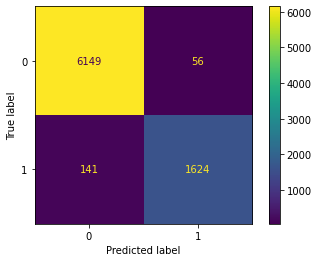

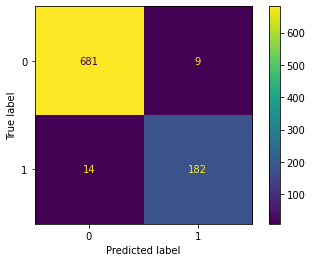

In [9]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc, X_train, y_train)  # classification_report(y_train, svc_train_pred)
plot_confusion_matrix(svc, X_val, y_val) # confusion_matrix(y_val, svc_val_pred)

Text(0.5, 0, 'Feature Importance (Bottom 20)')

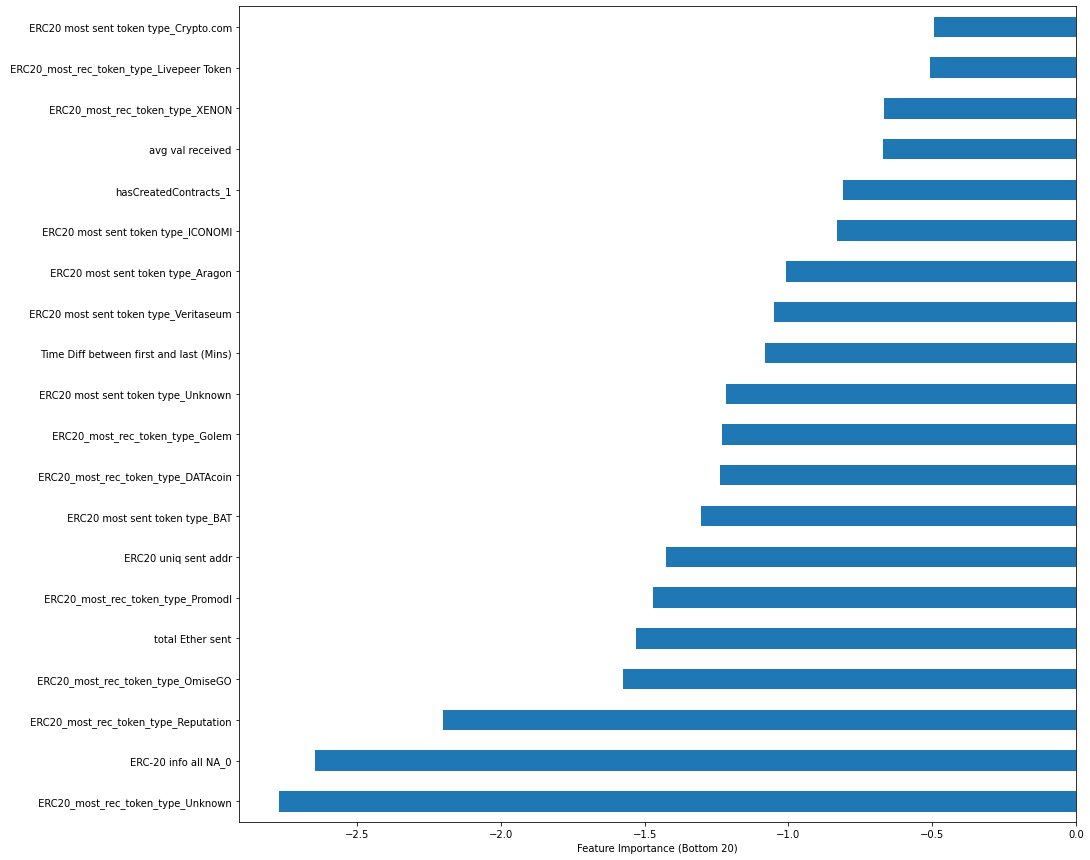

In [16]:
ax = pd.Series(svc.coef_[0], index=X_train.columns).nsmallest(20).plot(kind='barh',figsize=(15,15))

ax.set_xlabel("Feature Importance (Bottom 20)")


Text(0.5, 0, 'Feature Importance (Top 20)')

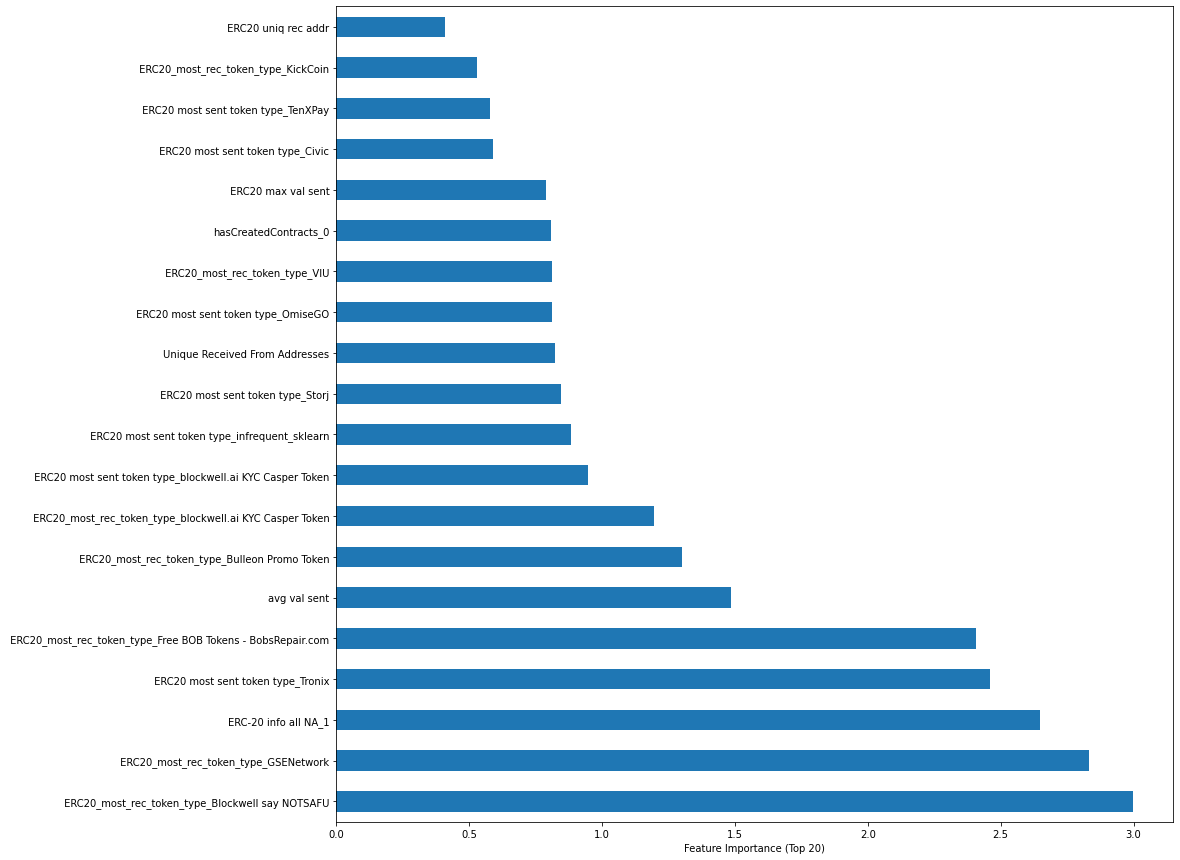

In [17]:
ax = pd.Series(svc.coef_[0], index=X_train.columns).nlargest(20).plot(kind='barh',figsize=(15,15))

ax.set_xlabel("Feature Importance (Top 20)")


<AxesSubplot:>

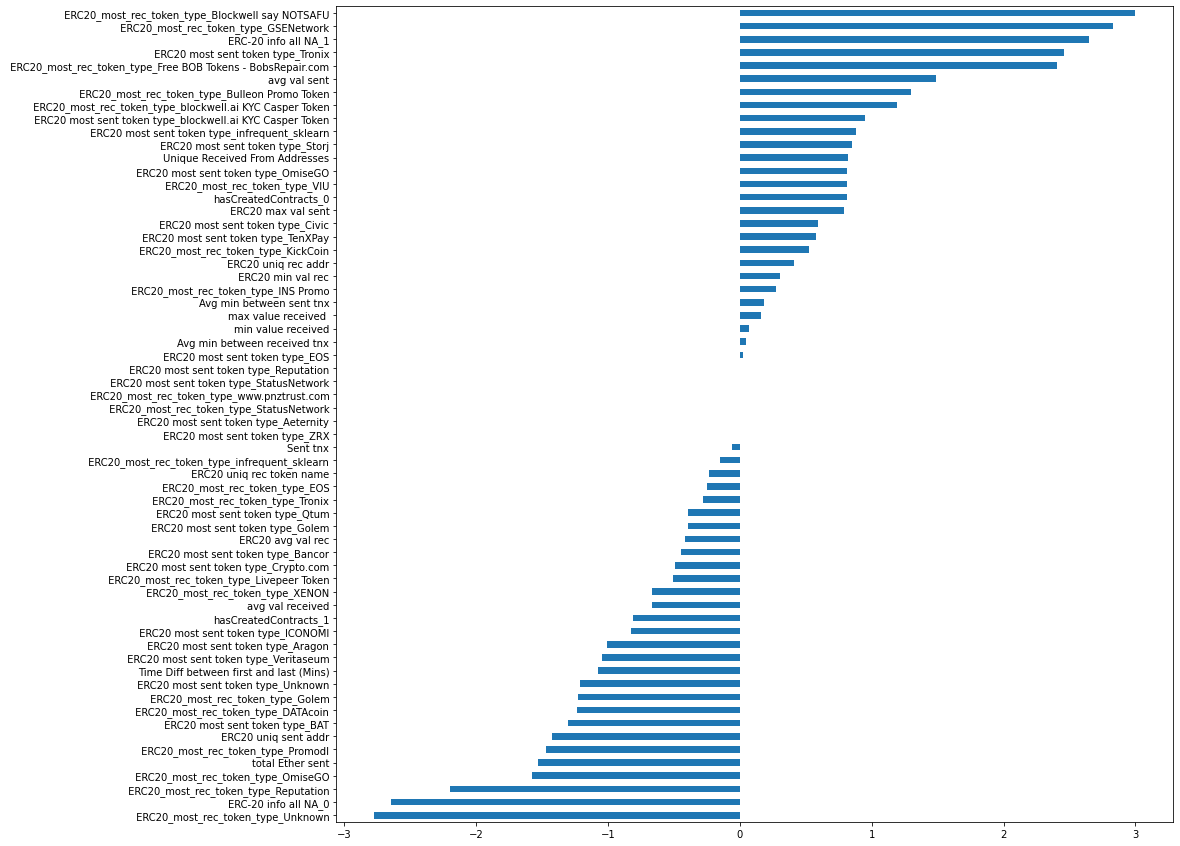

In [14]:
pd.Series(svc.coef_[0], index=X_train.columns).sort_values().plot(kind='barh',figsize=(15,15))